<a href="https://colab.research.google.com/github/Justdead12/CO2-Emissions-End-Assignment-Q1/blob/main/CO2_Emissions_End_Assignment_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%reload_ext google.colab.data_table

df1 = pd.read_csv('https://raw.githubusercontent.com/Justdead12/CO2-Emissions-End-Assignment/main/road-vehicles-per-1000-inhabitants-vs-gdp-per-capita.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Justdead12/CO2-Emissions-End-Assignment/main/annual-co2-emissions-per-country.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/Justdead12/CO2-Emissions-End-Assignment-Q1/main/population.csv')

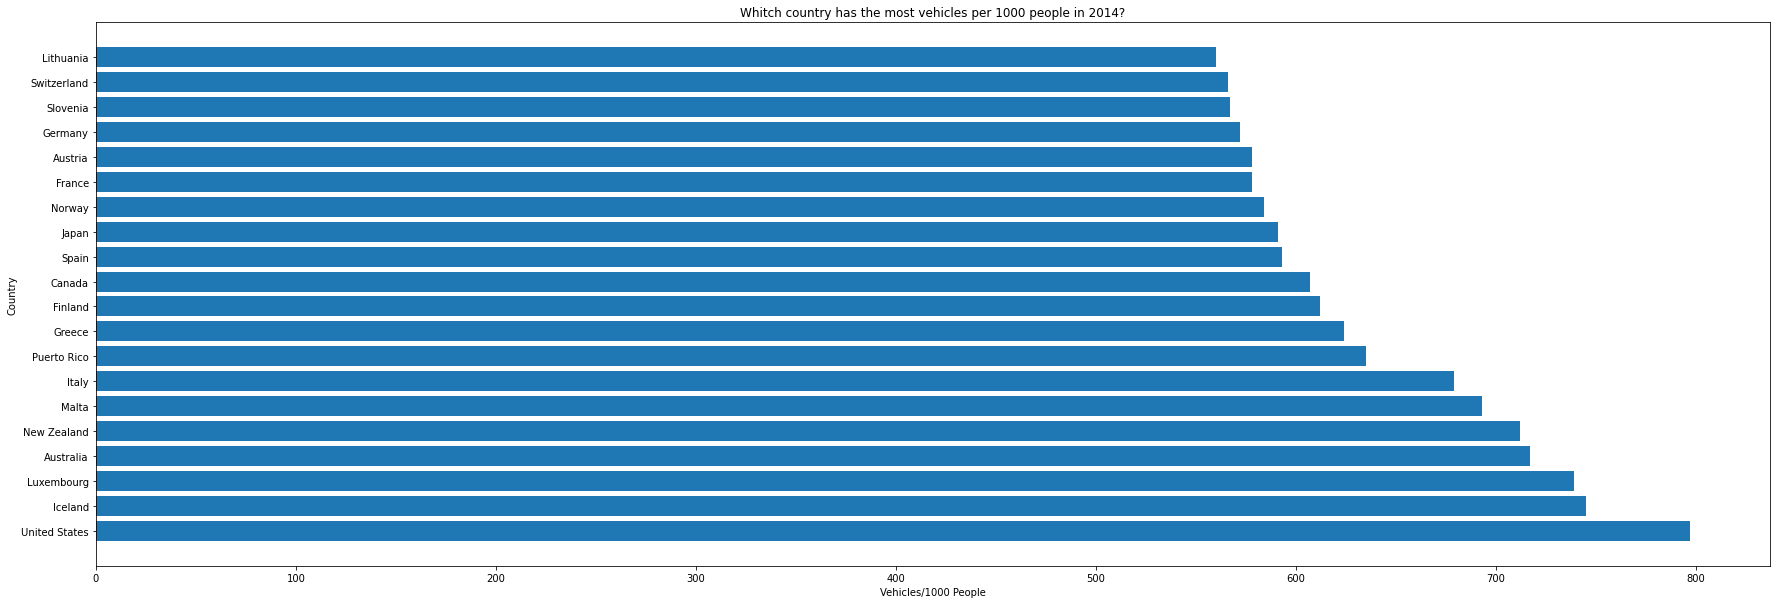

Conclusion:
United States has the most vehicles per 1000 people in 2014.
if we only take this info, United States is the biggest poluter.


In [3]:
# Make the dataframe more usefull and organized. The only usefull year is 2014 in this dataframe.
df_cars = df1.drop(columns= ['Code', 'Population (historical estimates)', 'Continent'])
df_cars = df_cars.rename(columns= {'Motor vehicles per 1000 people (NationMaster (2014))':'Vehicles/1000 People', 'GDP per capita, PPP (constant 2017 international $)':'GDP/Capita', 'Entity': 'Country'})
df_cars = df_cars.dropna()
df_cars = df_cars.set_index('Country')

# Make a list of the top 20 countries with the most vehicles per 1000 people.
top20_most_vehicles = df_cars['Vehicles/1000 People'].sort_values(ascending=False)[0:20]

# Make a graph of the top 20.
fig, ax = plt.subplots()

ax.barh(top20_most_vehicles.index, top20_most_vehicles)
plt.xlabel('Vehicles/1000 People')
plt.ylabel('Country')
plt.title('Whitch country has the most vehicles per 1000 people in 2014?')
fig.set_size_inches(30,10)

plt.show()

print('Conclusion:\nUnited States has the most vehicles per 1000 people in 2014.\nif we only take this info, United States is the biggest poluter.')

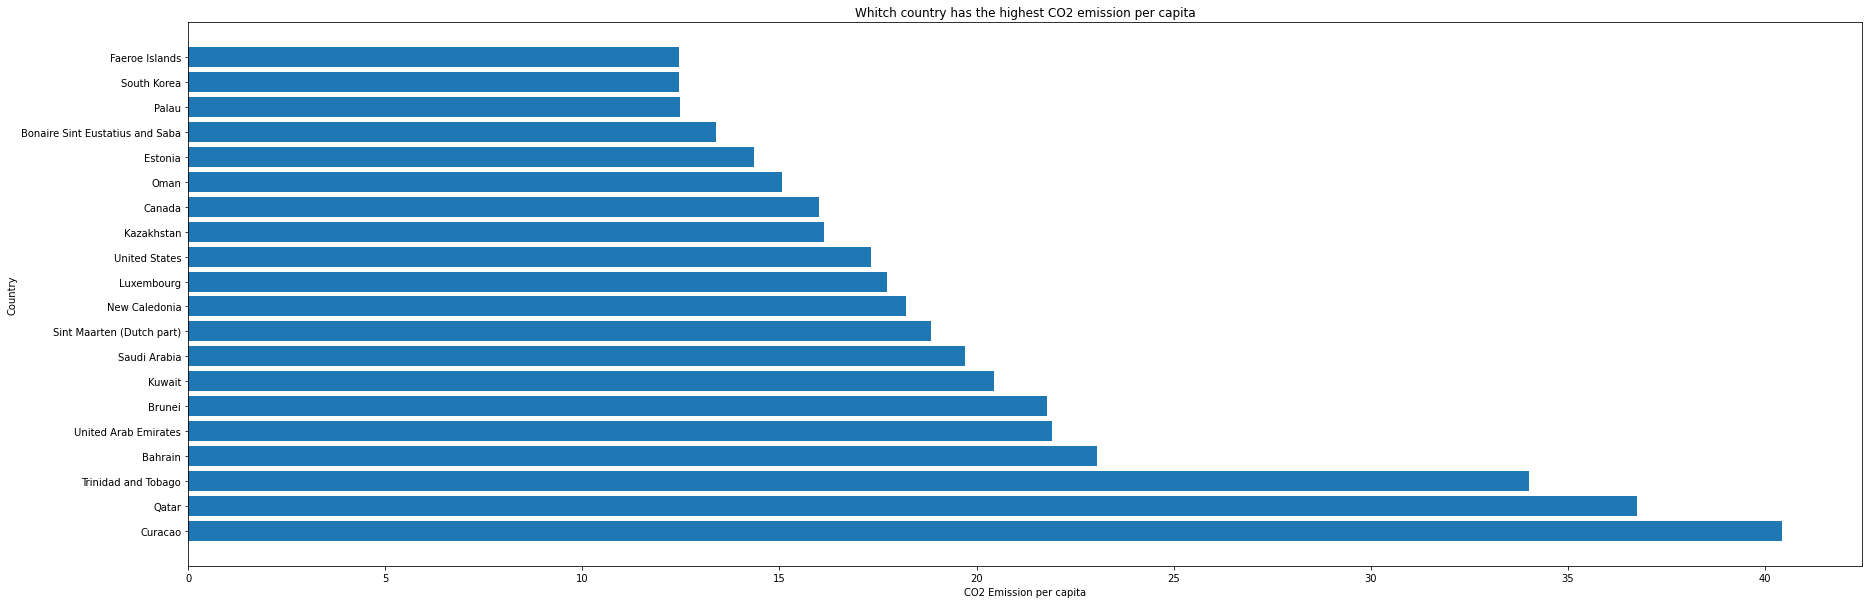


If we take a look at the CO2 Emissions per capita, we see many small country where the CO2 emission per capita is very high
the highist one is Curacao.


,Country,Annual CO2 emissions
119,Curacao,6408336



If we take a look at the list of the total annual CO2 emissions of 2014, Curacao is at place 119, so per capita Curacoa is the biggest poluter, but in total it is definitely not


In [4]:
# List of non countries.
non_country = (['World', 'Upper-middle-income countries', 'High-income countries', 'Lower-middle-income countries', 'Asia', 'Asia (excl. China & India)', 'Africa', 
                'North America', 'North America (excl. USA)', 'South America', 'Europe', 'European Union (28)', 'Oceania', 'United Kingdom', 
                'European Union (27)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'Australia', 'International transport'])

# Dataframe with population per country in 2014.
population_country = df1.drop(columns= {'Code', 'Motor vehicles per 1000 people (NationMaster (2014))', 'GDP per capita, PPP (constant 2017 international $)', 'Continent'})
population_country = population_country.rename(columns= {'Population (historical estimates)':'Population', 'Entity':'Country'})
population_country = population_country[(population_country['Year'] == 2014)]
population_country = population_country.set_index('Country')

# Dataframe of the annual CO2 emission per country in 2014.
df_emission_annual = df2.drop(columns= 'Code')
df_emission_annual = df_emission_annual.rename(columns= {'Entity':'Country'})
df_emission_annual = df_emission_annual[(df_emission_annual['Year'] == 2014)]
df_emission_annual = df_emission_annual.set_index('Country')
df_emission_annual_2014 = df_emission_annual.drop(non_country)

# Merge the 2 dataframes to one.
emission_population = pd.merge(df_emission_annual_2014, population_country, on= ['Country', 'Year'])

# Add CO2 Emission per capita.
emission_population['CO2 emissions per capita'] = emission_population['Annual CO2 emissions'] / emission_population['Population']

# Top 20 CO2 emissions per capita.
top20_co2_2014 = emission_population['CO2 emissions per capita'].sort_values(ascending=False)[0:20]

# Make a graph of the top 20.
fig, ax = plt.subplots()

ax.barh(top20_co2_2014.index, top20_co2_2014)
plt.xlabel('CO2 Emission per capita')
plt.ylabel('Country')
plt.title('Whitch country has the highest CO2 emission per capita')
fig.set_size_inches(30,10)

plt.show()

print("""\nIf we take a look at the CO2 Emissions per capita, we see many small country where the CO2 emission per capita is very high
the highist one is Curacao.""")

# Sort annual co2 emission and find Curacoa.
sort_co2_emissions = df_emission_annual_2014['Annual CO2 emissions'].sort_values(ascending=False)
sort_co2_emissions = sort_co2_emissions.reset_index()
display(sort_co2_emissions[sort_co2_emissions['Country'] == 'Curacao'])

print('\nIf we take a look at the list of the total annual CO2 emissions of 2014, Curacao is at place 119, so per capita Curacoa is the biggest poluter, but in total it is definitely not')

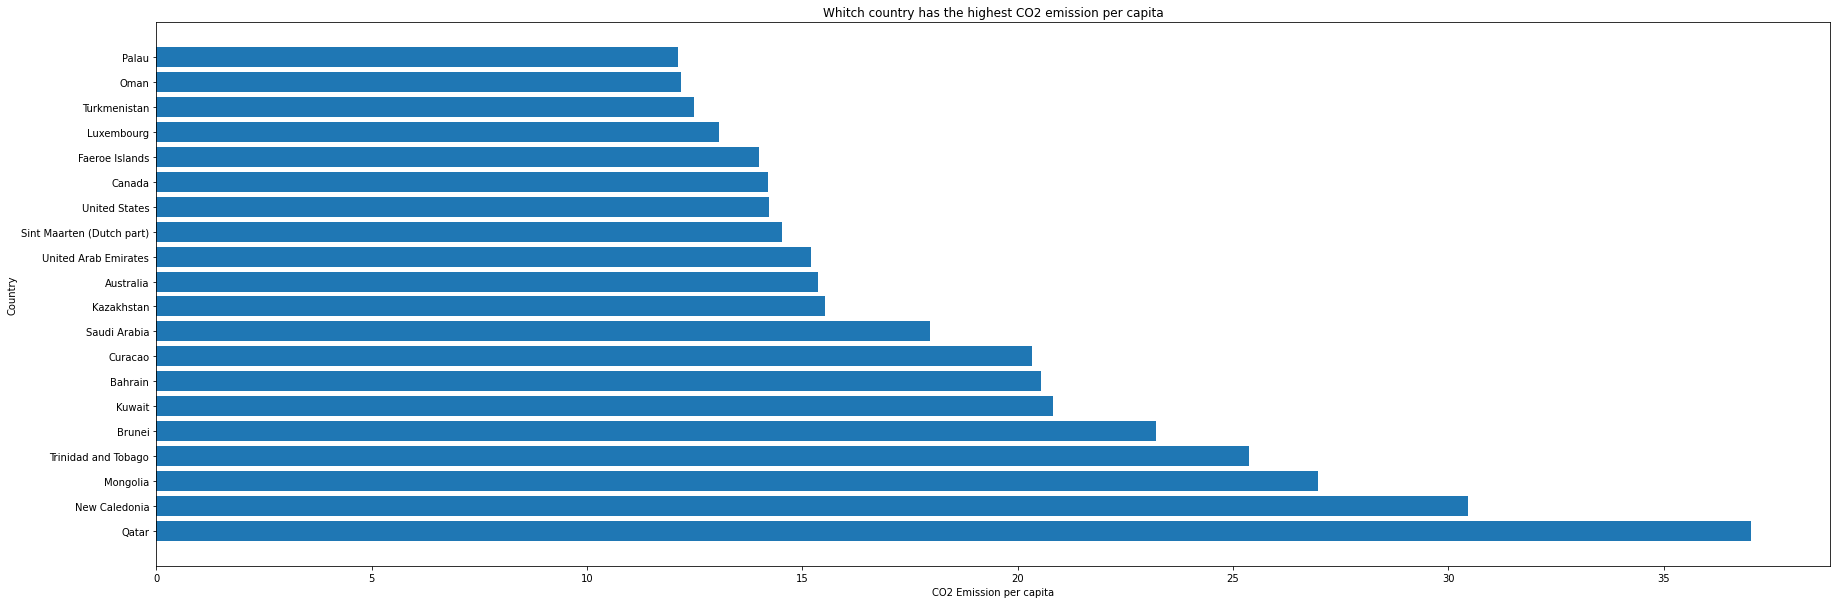


If we take a look at the CO2 Emissions per capita, we see many small country where the CO2 emission per capita is very high
the highist one is Qatar in this year. Curacoa is still in the top 10


,Country,Annual CO2 emissions
55,Qatar,106654967



If we take a look at the list of the total annual CO2 emissions of 2020, Qatar is at place 55, so per capita Qater is the biggest poluter, but in total it is definitely not


,Country,Annual CO2 emissions
160,Curacao,3335066



Curacao is at place 160 of the total annual CO2 emission in 2020. So it bettered their lives over time


In [32]:
# Dataframe with population per country in 2020.
population = df3.drop(columns= 'Code')
population = population.rename(columns= {'Entity':'Country', 'Population (historical estimates)':'Population'})
population = population[(population['Year'] == 2020)]
population = population.set_index('Country')

# Dataframe of the annual CO2 emission per country in 2020.
co2_emission = df2.drop(columns= 'Code')
co2_emission = co2_emission.rename(columns= {'Entity':'Country'})
co2_emission = co2_emission[(co2_emission['Year'] == 2020)]
co2_emission = co2_emission.set_index('Country')

# Merge the 2 dataframes to one.
emission_population = pd.merge(co2_emission, population, on= ['Country', 'Year'])

# Add CO2 Emission per capita.
emission_population['CO2 emissions per capita'] = emission_population['Annual CO2 emissions'] / emission_population['Population']

# Top 20 CO2 emissions per capita.
top20_co2_2020 = emission_population['CO2 emissions per capita'].sort_values(ascending=False)[0:20]

# Make a graph of the top 20.
fig, ax = plt.subplots()

ax.barh(top20_co2_2020.index, top20_co2_2020)
plt.xlabel('CO2 Emission per capita')
plt.ylabel('Country')
plt.title('Whitch country has the highest CO2 emission per capita')
fig.set_size_inches(30,10)

plt.show()

print("""\nIf we take a look at the CO2 Emissions per capita, we see many small country where the CO2 emission per capita is very high
the highist one is Qatar in this year. Curacoa is still in the top 10""")

# Sort annual co2 emission and find Qatar.
sort_co2_emissions = co2_emission['Annual CO2 emissions'].sort_values(ascending=False)
sort_co2_emissions = sort_co2_emissions.reset_index()
display(sort_co2_emissions[sort_co2_emissions['Country'] == 'Qatar'])

print('\nIf we take a look at the list of the total annual CO2 emissions of 2020, Qatar is at place 55, so per capita Qater is the biggest poluter, but in total it is definitely not')

# Find Curacao and see if it bettered their CO2 behavior.
display(sort_co2_emissions[sort_co2_emissions['Country'] == 'Curacao'])

print('\nCuracao is at place 160 of the total annual CO2 emission in 2020. So it bettered their lives over time')

In [33]:
# The final conclusion of the question 'What is the biggest predictor of a large CO2 output per capita of a country' is that over time the countries change in the CO2 emission per capita.
# In 2014 it was Curacoa and in 2020 it is Qatar. We can conclute that Curacoa reduced their CO2 emission per capita.
# Also Qatar his CO2 emission per capita is lower in 2020 then the CO2 emission of Curacao in 2014.
# We can compare this for every year if it is needed.